In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [2]:
blood = pd.read_csv('./blood_pressure.csv')
blood['diet'] = blood['diet'].replace({'0': 'no'})
blood = blood[blood['height'] != 0]
blood = blood[blood['blood_pressure'] != 0]
blood['age_height'] = np.log((blood['age']*blood['height']))
blood['food_agregate'] = (blood['water']*blood['carbs']*blood['fiber']*blood['protien']*blood['sugar'])/6
blood['drugs'] = (blood['marijuana_use']*blood['cocaine_uses'])/2
blood['substances'] = (blood['fats']*blood['cholesterol']*blood['alchohol']*blood['caffeine'])/4
blood[:10].T
blood[:10].T

,0,1,2,3,4,5,6,7,8,9
SEQN,93711.0,93716.0,93717.0,93721.0,93723.0,93726.0,93728.0,93738.0,93743.0,93746.0
blood_pressure,68.0,72.0,62.0,68.0,72.0,52.0,74.0,82.0,86.0,64.0
weight,62.1,77.7,74.4,85.1,64.9,74.3,118.1,97.7,79.3,62.1
height,170.6,159.2,174.1,154.0,170.1,154.5,188.1,170.2,187.8,158.4
bmi,21.3,30.7,24.5,35.9,22.4,31.1,33.4,33.7,22.5,24.8
salt_type,ordinary,ordinary,ordinary,no_extra_salt,ordinary,ordinary,ordinary,salt_substitute,ordinary,ordinary
diet,yes,no,no,no,no,no,no,yes,no,no
protien,101.33,103.91,97.12,79.98,41.62,81.89,80.0,116.36,175.55,80.67
carbs,339.6,442.98,345.52,226.61,269.6,184.99,213.19,50.95,684.76,222.26
sugar,148.21,133.24,137.01,105.06,147.49,72.17,95.17,11.92,170.03,86.64


In [5]:
m2 = smf.ols('np.log(blood_pressure) ~ age_height + C(race) + doc_diabetes + substances + drugs + bmi', blood).fit()
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test2 = het_breuschpagan(m2.resid, m2.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))
m2.summary()

{'LM Statistic': 5.983993695949826, 'LM-Test p-value': 0.7415191999788455}


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(blood_pressure)   R-squared:                       0.131
Model:                                OLS   Adj. R-squared:                  0.128
Method:                     Least Squares   F-statistic:                     44.18
Date:                    Sun, 08 Oct 2023   Prob (F-statistic):           2.33e-74
Time:                            12:17:50   Log-Likelihood:                 1192.0
No. Observations:                    2642   AIC:                            -2364.
Df Residuals:                        2632   BIC:                            -2305.
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.8800      0.076     37.784      0.000       2.731       3.029
C(race)[T.mexican_american]    -0.0103      0.010     -1.009      0.313      -0.030       0.010
C(race)[T.multi_racial]         0.0170      0.009      1.793      0.073      -0.002       0.036
C(race)[T.other_hispanic]      -0.0193      0.012     -1.632      0.103      -0.042       0.004
C(race)[T.white]               -0.0105      0.008     -1.257      0.209      -0.027       0.006
age_height                      0.1410      0.008     17.830      0.000       0.125       0.156
doc_diabetes                    0.0438      0.009      5.125      0.000       0.027       0.061
substances                   4.489e-11   1.97e-11      2.280      0.023    6.29e-12    8.35e-11
drugs                           0.0028      0.001      2.225      0.026       0.000       0.005
bmi                             0.0024      0.000      5.731      0.000       0.002       0.003
==============================================================================
Omnibus:                      173.593   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.127
Skew:                          -0.528   Prob(JB):                     2.20e-59
Kurtosis:                       4.157   Cond. No.                     3.94e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [936]:
sm.stats.anova_lm(m2, typ=2)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(race),424.068784,4.0,5.935287,0.014884
age_height,106.017196,1.0,5.935287,0.014884
min_vig_work,106.017196,1.0,5.935287,0.014884
substances,106.017196,1.0,5.935287,0.014884
drugs,106.017196,1.0,5.935287,0.014884
bmi,106.017196,1.0,5.935287,0.014884
Residual,72270.407409,4046.0,NaN,NaN


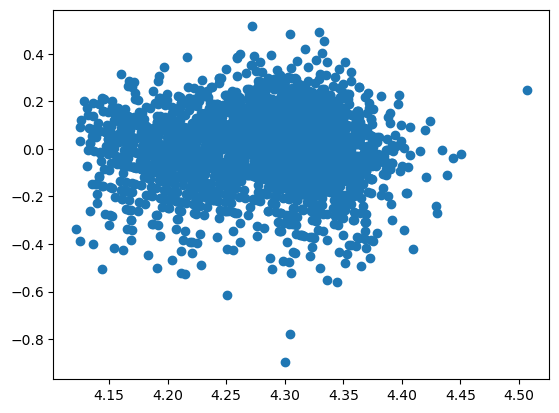

In [6]:
resid = m2.resid
values = m2.fittedvalues
plt.scatter(values, resid)

In [893]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test2 = het_breuschpagan(m2.resid, m2.model.exog)
labels2 = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels2, bp_test2)))

{'LM Statistic': 13.769308164886182, 'LM-Test p-value': 0.008068919203851199}


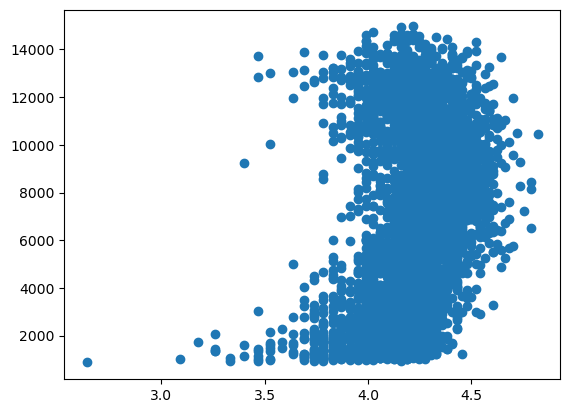

In [880]:
plt.scatter(np.log(blood['blood_pressure']), blood['height']*blood['age'])